## Базовый пример

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
import numpy as np
from sklearn.datasets import load_iris

In [3]:
import matplotlib.pyplot as plt

In [4]:
X, y = load_iris(return_X_y=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Способ 1 задать модель - старый

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3),
    keras.layers.Softmax()
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 50ms/step - loss: 1.3087 - accuracy: 0.2917 - val_loss: 1.1622 - val_accuracy: 0.4667
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 1.2055 - accuracy: 0.3000 - val_loss: 1.0861 - val_accuracy: 0.4667
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1041 - accuracy: 0.3167 - val_loss: 1.0179 - val_accuracy: 0.6000
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0254 - accuracy: 0.5917 - val_loss: 0.9568 - val_accuracy: 0.7333
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9541 - accuracy: 0.6417 - val_loss: 0.9033 - val_accuracy: 0.7333
Epoch 6/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8922 - accuracy: 0.6500 - val_loss: 0.8577 - val_accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8394 - accuracy: 0.6500 - val_loss: 0.8183 - val_accuracy: 0.7667
Epoch 8/50
4/4 [=================

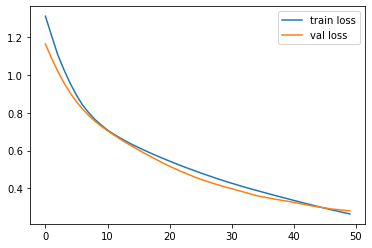

In [11]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

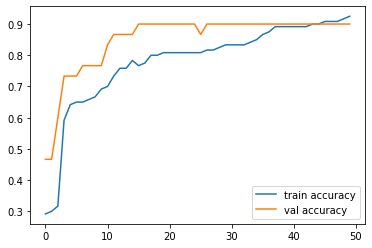

In [12]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Способ 2 задать модель - functional api

In [13]:
i = keras.layers.Input(shape=(4,))
o = keras.layers.Dense(16, activation='relu')(i)
o = keras.layers.Dense(32, activation='relu')(o)
o = keras.layers.Dense(3)(o)
o = keras.layers.Softmax()(o)

In [14]:
model = keras.Model(inputs=i, outputs=o)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
_________________________________________________________________
softmax_1 (Softmax)          (None, 3)                 0         
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [17]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 37ms/step - loss: 1.1682 - accuracy: 0.1083 - val_loss: 1.1255 - val_accuracy: 0.1000
Epoch 2/50
4/4 [==============================] - 0s 5ms/step - loss: 1.1174 - accuracy: 0.1583 - val_loss: 1.0692 - val_accuracy: 0.2333
Epoch 3/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0688 - accuracy: 0.3083 - val_loss: 1.0199 - val_accuracy: 0.3667
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 1.0256 - accuracy: 0.4333 - val_loss: 0.9705 - val_accuracy: 0.7000
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9825 - accuracy: 0.5917 - val_loss: 0.9267 - val_accuracy: 0.9000
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9435 - accuracy: 0.7000 - val_loss: 0.8819 - val_accuracy: 0.9000
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9074 - accuracy: 0.7583 - val_loss: 0.8384 - val_accuracy: 0.9333
Epoch 8/50
4/4 [=================

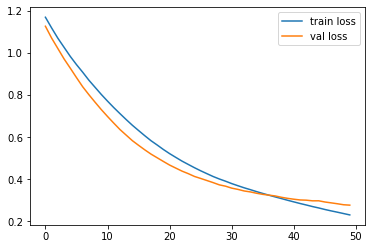

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

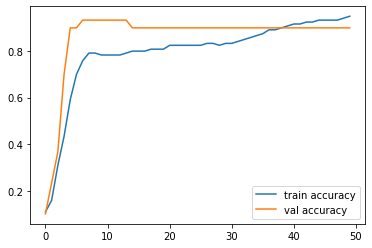

In [19]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

## Работа с картинками

In [20]:
!wget -O catsdogs.zip "https://drive.google.com/uc?export=download&id=15p_fYM7CscmaLFAE2C0zvGvXpWk1wV6h"

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [21]:
!unzip catsdogs.zip

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [22]:
!ls catsdogs/

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [23]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [24]:
train = train_generator.flow_from_directory('catsdogs/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test = test_generator.flow_from_directory('catsdogs/test', target_size=(224, 224), batch_size=32, class_mode='binary')

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'catsdogs/train'

In [25]:
for d in train:
  break

NameError: name 'train' is not defined

In [26]:
len(d)

NameError: name 'd' is not defined

In [27]:
d[0].shape

NameError: name 'd' is not defined

In [28]:
d[1]

NameError: name 'd' is not defined

In [29]:
i = keras.layers.Input(shape=(224,224,3))
o = keras.layers.Conv2D(16, (5,5), strides=(3,3))(i)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(32, (3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Conv2D(64, (3,3), strides=(1,1))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [30]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 74, 74, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
re_lu (ReLU)                 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 17, 17, 32)       

In [31]:
model.fit(train, epochs=10, validation_data=test)

NameError: name 'train' is not defined

## Добавим Batch Normalization

In [32]:
i = keras.layers.Input(shape=(224,224,3))
o = keras.layers.BatchNormalization()(i)
o = keras.layers.Conv2D(16, (5,5), strides=(3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.Conv2D(32, (3,3))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.Conv2D(64, (3,3), strides=(1,1))(o)
o = keras.layers.MaxPool2D((2,2))(o)
o = keras.layers.ReLU()(o)
o = keras.layers.BatchNormalization()(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [33]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 16)        1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
re_lu_3 (ReLU)               (None, 37, 37, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 35, 35, 32)       

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 3s 166ms/step - loss: 0.8217 - accuracy: 0.5640 - val_loss: 0.6902 - val_accuracy: 0.5700
Epoch 2/10
16/16 [==============================] - 2s 148ms/step - loss: 0.4539 - accuracy: 0.7860 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 2s 150ms/step - loss: 0.3048 - accuracy: 0.8960 - val_loss: 0.6908 - val_accuracy: 0.5100
Epoch 4/10
16/16 [==============================] - 2s 148ms/step - loss: 0.2148 - accuracy: 0.9460 - val_loss: 0.7114 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 2s 148ms/step - loss: 0.1457 - accuracy: 0.9800 - val_loss: 0.7371 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 2s 149ms/step - loss: 0.0957 - accuracy: 0.9960 - val_loss: 0.8037 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 2s 149ms/step - loss: 0.0688 - accuracy: 0.9960 - val_loss: 0.8240 - val_accuracy: 0.5000
Epoch 

## Готовые архитектуры сети

In [ ]:
train_generator = keras.preprocessing.image.ImageDataGenerator()
test_generator = keras.preprocessing.image.ImageDataGenerator()
train = train_generator.flow_from_directory('catsdogs/train', target_size=(224, 224), batch_size=32, class_mode='binary')
test = test_generator.flow_from_directory('catsdogs/test', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights=None)

In [ ]:
i = keras.layers.Input((224, 224, 3), dtype = tf.uint8)
o = tf.cast(i, tf.float32)
o = keras.applications.vgg16.preprocess_input(o)
o = vgg16(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [ ]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast_8 (TensorFl [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_8  [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd_8 (Tenso [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)               

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 14s 893ms/step - loss: 32.9062 - accuracy: 0.4640 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 13s 803ms/step - loss: 0.7045 - accuracy: 0.5200 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 13s 798ms/step - loss: 0.6953 - accuracy: 0.4580 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 13s 803ms/step - loss: 0.6957 - accuracy: 0.4780 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 13s 803ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 13s 803ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 13s 805ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.500

## Предобученные архитектуры сети

In [ ]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False)

In [ ]:
i = keras.layers.Input((224, 224, 3), dtype = tf.uint8)
o = tf.cast(i, tf.float32)
o = keras.applications.vgg16.preprocess_input(o)
o = vgg16(o)
o = keras.layers.Flatten()(o)
o = keras.layers.Dense(1, activation='sigmoid')(o)

In [ ]:
vgg16.trainable = False

In [ ]:
model = keras.Model(inputs=i, outputs=o)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_Cast_9 (TensorFl [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice_9  [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd_9 (Tenso [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

In [ ]:
model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
16/16 [==============================] - 5s 334ms/step - loss: 1.9949 - accuracy: 0.8760 - val_loss: 1.7632 - val_accuracy: 0.9150
Epoch 2/10
16/16 [==============================] - 5s 312ms/step - loss: 0.1037 - accuracy: 0.9960 - val_loss: 0.8308 - val_accuracy: 0.9700
Epoch 3/10
16/16 [==============================] - 5s 310ms/step - loss: 0.0186 - accuracy: 0.9980 - val_loss: 1.3951 - val_accuracy: 0.9300
Epoch 4/10
16/16 [==============================] - 5s 311ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2730 - val_accuracy: 0.9350
Epoch 5/10
16/16 [==============================] - 5s 312ms/step - loss: 2.2971e-06 - accuracy: 1.0000 - val_loss: 1.2145 - val_accuracy: 0.9400
Epoch 6/10
16/16 [==============================] - 5s 311ms/step - loss: 1.2132e-08 - accuracy: 1.0000 - val_loss: 1.2036 - val_accuracy: 0.9400
Epoch 7/10
16/16 [==============================] - 5s 310ms/step - loss: 9.8486e-09 - accuracy: 1.0000 - val_loss: 1.2015 - val_accuracy: 0